In this notebook, we'll take a look at how Airbnb prices in NYC have trended during COVID-19 from Aug 2020 to Aug 2021. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import time

In [2]:
# read listings csv for each individual month into one dataframe
# create a new column 'date' by extracting the month and year from each file name
filenames = glob.glob(os.path.join('data', 'listings_20*.csv'))
df = pd.concat(pd.read_csv(file).assign(date=file[-10:-4]) for file in filenames)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,date
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,30,48,2019-11-04,0.36,2,365,202012
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,74,1,375,2020-11-22,4.97,1,307,202012
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.36,1,365,202012
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,65,2,474,2020-09-25,3.36,1,0,202012
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.86,1,0,202012


In [3]:
df.shape

(512146, 17)

In [4]:
len(df.id.unique())

62628

There are 62,628 unique properties during this 12-month period. (Data is scraped at the beginning of each month so we effectively have data from Aug 2020 - Jul 2021)

Let's take a look at average price over time across the entire city.

In [5]:
# reformat date column to be more readable
df.date = df.date.apply(lambda x:x[:4] + '-' + x[4:])

In [6]:
df.groupby('date')['price'].agg(['mean', 'median'])

,mean,median
date,,
2020-08,148.605670,100
2020-09,149.557413,100
2020-10,150.104330,100
2020-11,149.213722,100
2020-12,145.921187,100
2021-01,143.710901,99
2021-02,142.842240,99
2021-03,144.288824,99
2021-04,148.559274,100


It looks like the average price as measured both by the mean and median decreased from end of 2020 to 1Q 2021 and then increased again. Let's visualize both the mean and the distribution of prices by month to see the trend more clearly. 

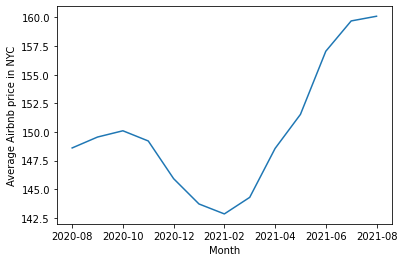

In [14]:
df.groupby('date')['price'].mean().plot()
plt.ylabel('Average Airbnb price in NYC')
plt.xlabel('Month')
plt.savefig('figures/price_over_time', dpi=200)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2020-08'),
  Text(1, 0, '2020-09'),
  Text(2, 0, '2020-10'),
  Text(3, 0, '2020-11'),
  Text(4, 0, '2020-12'),
  Text(5, 0, '2021-01'),
  Text(6, 0, '2021-02'),
  Text(7, 0, '2021-03'),
  Text(8, 0, '2021-04'),
  Text(9, 0, '2021-05'),
  Text(10, 0, '2021-06'),
  Text(11, 0, '2021-07'),
  Text(12, 0, '2021-08')])

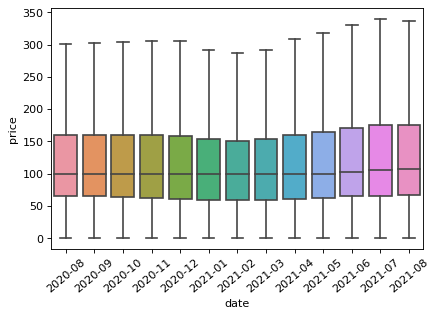

In [8]:
date_order = sorted(df.date.unique())
plt.figure(figsize=(6,4), dpi=80)
sns.boxplot(x='date', y='price', data=df, showfliers=False, order=date_order)
plt.xticks(rotation=40)

The distribution of listing prices looks pretty similar from month to month, and we can see the slight increase of prices at the start of summer 2021. 

Next, let's take a look at the trends by borough.

In [21]:
avgprice_by_borough

mean_price
date    neighbourhood_group            
2020-08 Bronx                 92.751479
        Brooklyn             120.225258
        Manhattan            191.880466
        Queens                99.754965
        Staten Island        110.947214
...                                 ...
2021-08 Bronx                104.499025
        Brooklyn             131.599263
        Manhattan            205.278361
        Queens               109.871073
        Staten Island        114.800000

[65 rows x 1 columns]

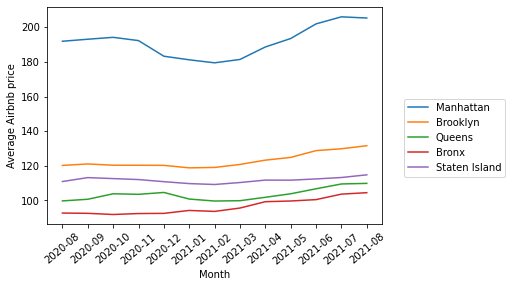

In [24]:
avgprice_by_borough = df.groupby(['date', 'neighbourhood_group']).agg(mean_price=('price', 'mean'))
boroughs = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
avgprice_by_borough = avgprice_by_borough.reindex(boroughs, level='neighbourhood_group') # re-order boroughs to match plots in price_prediction.ipynb
sns.lineplot(data=avgprice_by_borough, x='date', y='mean_price', hue='neighbourhood_group')
plt.legend(bbox_to_anchor=(1.05, 0.6), loc=2)
plt.ylabel('Average Airbnb price')
plt.xlabel('Month')
plt.xticks(rotation=40)
plt.savefig('figures/price_over_time_borough', dpi=200, bbox_inches='tight')

Interestingly, there is quite a bit of divergence in price trends across boroughs. Prices in Manhattan started falling earlier than other boroughts around November 2020. Brooklyn barely saw a dip in prices, only briefly in the beginning of 2021, whereas Bronx saw a steady increase since the end of 2020. 